68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Extracting dataset...
Dataset is ready!
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 695s 11s/step - accuracy: 0.5363 - loss: 0.9166 - val_accuracy: 0.7930 - val_loss: 0.5084
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 689s 11s/step - accuracy: 0.7047 - loss: 0.5763 - val_accuracy: 0.5970 - val_loss: 0.6815
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 678s 11s/step - accuracy: 0.7088 - loss: 0.5766 - val_accuracy: 0.8400 - val_loss: 0.4064
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 673s 11s/step - accuracy: 0.7104 - loss: 0.5254 - val_accuracy: 0.8020 - val_loss: 0.4185
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 714s 11s/step - accuracy: 0.7296 - loss: 0.5309 - val_accuracy: 0.7900 - val_loss: 0.4294
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 681s 11s/step - accuracy: 0.7483 - loss: 0.4956 - val_accuracy: 0.8350 - val_loss: 0.3697
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 681s 11s/step - accuracy: 0.7645 - loss: 0.4816 - val_accuracy: 0.8410 - val_loss: 0.3572
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 716s 11s/step - accuracy: 0.7811 - loss: 0.4630 - val_accuracy: 0.

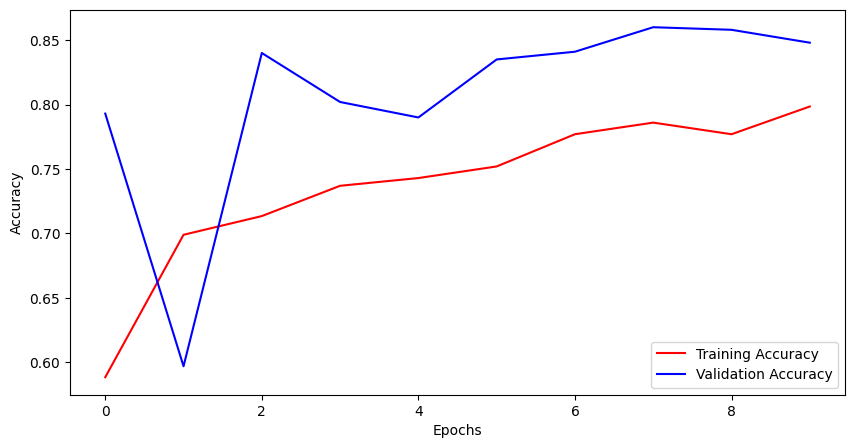

Model saved successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,910,019 (72.14 MB)

 Trainable params: 4,195,329 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

#  Step 1: Download and Extract Dataset if Missing
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = os.path.expanduser("~/.keras/datasets/cats_and_dogs_filtered.zip")
extract_path = os.path.expanduser("~/.keras/datasets/cats_and_dogs_filtered")

#  Download Dataset if Not Available
if not os.path.exists(zip_path):
    print("Downloading dataset...")
    zip_path = keras.utils.get_file("cats_and_dogs_filtered.zip", dataset_url)

#  Extract Dataset if Not Already Extracted
if not os.path.exists(extract_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.expanduser("~/.keras/datasets/"))

# Step 2: Define Train & Validation Directories
train_dir = os.path.join(extract_path, "train")
validation_dir = os.path.join(extract_path, "validation")

# Check if dataset exists
if not os.path.exists(train_dir) or not os.path.exists(validation_dir):
    raise FileNotFoundError("Dataset extraction failed. Check the dataset path!")

print("Dataset is ready!")

# Step 3: Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

#  Step 4: Load Data Using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)

# Step 5: Load Pretrained VGG16 Model (Excluding Top Layers)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the convolutional base

#  Step 6: Add Custom Fully Connected Layers
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")  # Binary Classification (Cat vs Dog)
])

#  Step 7: Compile Model
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

#  Step 8: Train Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Adjust epochs for better performance
    verbose=1
)

#  Step 9: Evaluate Model Performance
train_acc = history.history["accuracy"][-1]
val_acc = history.history["val_accuracy"][-1]
print(f"Final Training Accuracy: {train_acc:.2f}")
print(f"Final Validation Accuracy: {val_acc:.2f}")

#  Step 10: Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy", color="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#  Step 11: Save the Model
model.save("cats_dogs_vgg16_model.h5")
print("Model saved successfully!")

#  Step 12: Load the Saved Model
loaded_model = keras.models.load_model("cats_dogs_vgg16_model.h5")
loaded_model.summary()

# Step 13: Make Predictions on New Images
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    prediction = loaded_model.predict(img_array)

    if prediction[0][0] > 0.5:
        print(f"Prediction: Dog ({prediction[0][0]*100:.2f}% confidence)")
    else:
        print(f"Prediction: Cat ({(1 - prediction[0][0])*100:.2f}% confidence)")

# Example Usage:
# predict_image("path_to_your_image.jpg")
